# Loi de Benford

## Introduction
La loi de Benford est une loi empirique qui prédit la distribution des premiers chiffres significatifs dans de nombreux ensembles de données réelles.

**Objectif** : Étudier la répartition du 1er chiffre significatif de la population des communes françaises et comparer avec :
- Une distribution uniforme
- La loi de Benford : $P(I=i) = \log_{10}(1 + \frac{1}{i})$

## 1. Importation des bibliothèques

In [77]:
# Importation des bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chisquare

## 2. Chargement des données

In [78]:
# Chargement du fichier CSV des communes françaises
data_commune = pd.read_csv("communes-france-INSEE.csv")
data_commune.head()

,Nom de la commune,Populationtotal,Population_string,Premier_chiffre
0,L' Abergement-Clémenciat,794,794,7
1,L' Abergement-de-Varey,249,249,2
2,Ambérieu-en-Bugey,14428,14428,1
3,Ambérieux-en-Dombes,1723,1723,1
4,Ambléon,117,117,1


In [79]:
# Rajout d'une colonne du nombre de la population en string : 

import pandas as pd

def ajouter_colonne_string(fichier_csv):
    
    df = pd.read_csv(fichier_csv)
    df['Population_string'] = df['Populationtotal'].astype(str)
    df.to_csv('communes-france-INSEE.csv', index=False)
    return df

df = ajouter_colonne_string('communes-france-INSEE.csv')

## 3. Extraction du premier chiffre significatif

In [80]:
# Fonction pour extraire le premier chiffre significatif
def premier_chiffre(nombre):
    for valeur in df['Population_string']:
        print(valeur[0])
    
premier_chiffre(3)
# Application de la fonction sur la colonne population


7
2
1
1
1
2
7
3
1
3
3
1
3
4
6
4
2
1
1
7
6
3
4
9
2
6
1
6
8
3
9
3
3
3
7
4
5
7
2
4
6
2
8
1
9
3
3
9
3
4
1
3
5
8
5
1
2
9
5
1
1
7
2
7
1
4
3
1
2
1
1
1
1
8
6
7
6
9
8
3
2
9
2
3
1
5
7
1
1
1
1
1
9
1
4
1
1
1
1
2
1
1
4
8
6
1
5
1
1
1
1
6
6
5
3
2
4
1
2
8
3
4
7
4
4
9
4
1
4
1
1
2
1
7
2
1
8
2
1
3
9
7
2
1
2
6
6
9
1
1
8
1
1
8
1
1
1
6
7
6
1
9
1
2
2
6
1
1
3
2
2
2
7
1
2
3
1
7
2
1
7
1
1
9
1
3
3
6
6
1
3
2
2
1
1
1
1
1
2
6
6
1
1
1
7
2
3
2
1
2
8
2
6
3
1
7
3
6
7
3
1
3
2
2
3
1
1
6
2
1
8
1
1
9
1
4
2
2
6
1
9
2
6
1
8
1
8
6
4
8
1
5
5
7
2
1
1
2
2
1
8
8
8
2
4
8
1
3
7
4
3
9
4
9
9
5
1
1
1
6
7
3
3
1
1
1
1
2
5
8
2
2
4
2
1
5
1
4
2
5
4
2
1
1
7
1
7
1
7
8
9
1
1
4
1
1
8
4
2
7
6
9
1
2
1
1
2
1
1
1
5
1
1
2
2
6
5
9
1
1
2
1
2
6
1
1
1
1
1
6
3
2
5
1
4
1
1
6
1
7
1
1
1
2
7
2
1
1
1
7
5
1
2
3
4
2
4
2
1
7
4
1
6
1
1
3
7
3
6
1
1
7
3
5
6
1
1
3
2
1
2
5
1
1
7
4
7
7
2
3
2
3
4
9
4
1
5
3
2
2
3
2
6
2
1
1
2
8
1
5
1
1
8
3
7
2
5
1
1
7
3
3
1
4
9
1
1
8
2
2
2
1
3
3
6
2
2
1
1
4
6
1
6
6
2
1
3
1
1
3
4
1
7
2
1
1
3
9
1
2
1
1
4
5
2
2
3
2
1
1
1
1
1
2
8
1
1
4
2
7


## 4. Répartition en 9 classes et calcul des fréquences observées

In [81]:
def ajouter_colonne_classe():
    df['Premier_chiffre'] = df['Population_string'].astype(str).str[0]
    df.to_csv('communes-france-INSEE.csv', index=False)

ajouter_colonne_classe()


[10661, 6296, 4428, 3202, 2806, 2397, 1986, 1716, 1503]


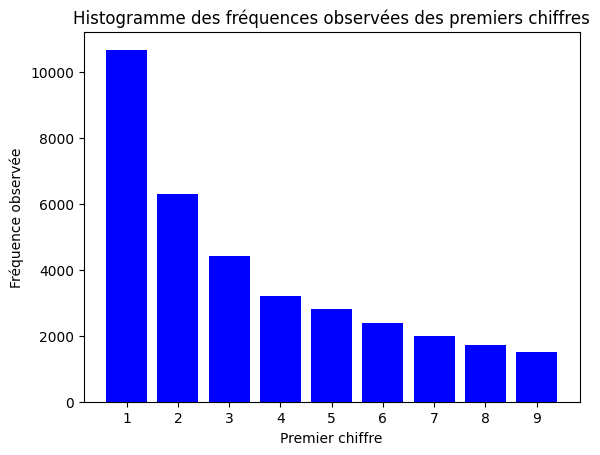

In [82]:
# Histogramme des fréquences observées
def calcul_freq():
    frequences = [0] * 9
    
    for valeur in df['Premier_chiffre']:
        chiffre = int(valeur)
        frequences[chiffre - 1] = frequences[chiffre - 1] + 1 
    return frequences

frequences_observees = calcul_freq()
print(frequences_observees)

plt.bar(range(1, 10), frequences_observees, color='blue')
plt.xlabel('Premier chiffre')
plt.ylabel('Fréquence observée')
plt.title("Histogramme des fréquences observées des premiers chiffres")
plt.xticks(range(1, 10))
plt.show()


## 5. Distribution uniforme

[3888.3333333333335, 3888.3333333333335, 3888.3333333333335, 3888.3333333333335, 3888.3333333333335, 3888.3333333333335, 3888.3333333333335, 3888.3333333333335, 3888.3333333333335]


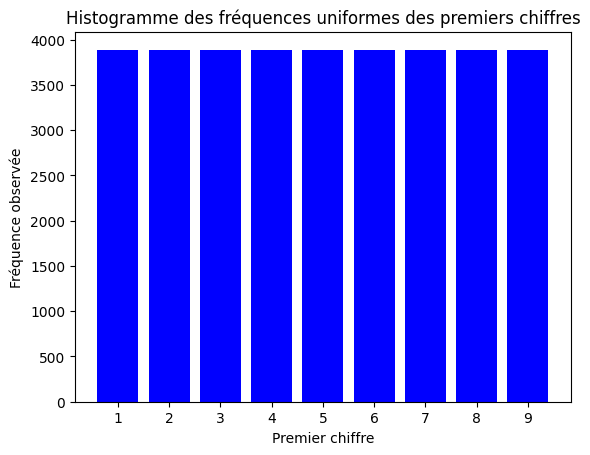

In [83]:
# Calculer les fréquences théoriques pour une distribution uniforme
# Si la distribution est uniforme, chaque chiffre a la même probabilité

total = sum(frequences_observees)
frequences_uniforme = [total / 9] * 9

print(frequences_uniforme)

plt.bar(range(1, 10), frequences_uniforme, color='blue')
plt.xlabel('Premier chiffre')
plt.ylabel('Fréquence observée')
plt.title("Histogramme des fréquences uniformes des premiers chiffres")
plt.xticks(range(1, 10))
plt.show()

## Histogramme de comparaison : fréquences observées vs distribution uniforme
On constate que les fréquences observées ne suivent pas une distribution uniforme.

## 6. Loi de Benford

In [84]:
# Histogramme de comparaison : fréquences observées vs loi de Benford


## 7. Test du Khi-deux (χ²)

In [85]:
# Test du khi-deux pour comparer les fréquences observées avec la loi de Benford
# H0 : Les données suivent la loi de Benford
# H1 : Les données ne suivent pas la loi de Benford



In [86]:
# Interprétation des résultats du test


## 8. Conclusion et résumé sur la loi de Benford